In [1]:
import pickle 
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import gzip
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn

Using TensorFlow backend.


In [2]:
f = gzip.GzipFile('datasetTranskay/cb513-window19Middle-repeating-left-right0.npy.gz', "r")
testset = np.load(f)
print(testset.shape)

(84765, 19, 57)


In [3]:
path = "allDataset_assembly/model-assmebly-2.hdf5"

In [38]:
def get_confusion_matrix(path):
    
    act = []
    pred = []
    
    m =  load_model( path )
    res = m.predict(testset[:,:,35:56], verbose = 1)
    print(res.shape)
        
    for i in range(testset.shape[0]):
        act.append( np.argmax(testset[i,0,22:30]) )
        pred.append( np.argmax(res[i]) )
    
    return np.array(act), np.array(pred)   
    

In [39]:
def get_assembly_pred(stacked_predictions, indices):
    
    assembly_pred = []    
    for i in range(stacked_predictions.shape[1]):

        window_preds = stacked_predictions[indices,i]
        window_pred =  np.average(window_preds, 0)
        assembly_pred.append(window_pred)
     
    return np.array(assembly_pred) 

In [53]:
def get_confusion_matrix_assembly(stacked_pred, indices):
    
    act = []
    pred = []
    assem = get_assembly_pred(stacked_predictions, indices)
    for i in range(testset.shape[0]):
        act.append( np.argmax(testset[i,0,22:30]) )
        pred.append( np.argmax(assem[i]) )
    
    return np.array(act), np.array(pred)   
    

In [64]:
act, pred = get_confusion_matrix(path)

84765/84765 [==============================] - 51s 607us/step
(84765, 8)


In [66]:
stacked_predictions = pickle.load( open( "allDataset_assembly/stacked_predictions-20", "rb" ) )
stacked_predictions = np.array( [i[0] for i in stacked_predictions] )

indices = pickle.load( open( "allDataset_assembly/supervised-assembly-indices", "rb" ) )
actA, predA = get_confusion_matrix_assembly(stacked_predictions, indices)

In [67]:
confAssembly = confusion_matrix(actA, predA)
confSingle = confusion_matrix(act, pred)

confM = confAssembly - confSingle
print(confM)

[[ 166  -11   27    2    0    6 -172  -18]
 [  10   -8   12    0    0   -3  -11    0]
 [-185   -5  241   -9    0  -12  -40   10]
 [ -30    0    1   87    0  -13  -24  -21]
 [  -1    0    0    0    0    0    0    1]
 [ -91   -2  -34  -14    0  232  -45  -46]
 [ -71   -5    0    2    0    7   -5   72]
 [ -74   -1  -30   12    2   44  -87  134]]


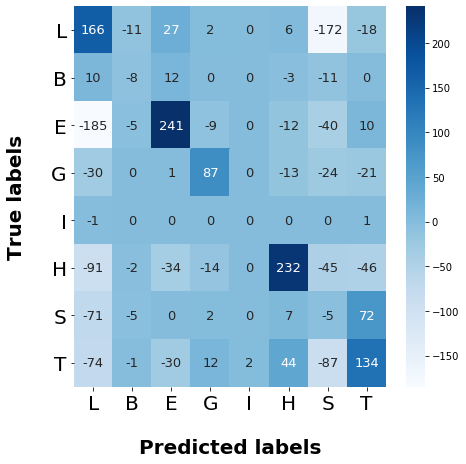

In [68]:
fig = plt.figure()
fig.set_size_inches(7,7)
ax = plt.gca()



sn.heatmap(confM,cmap="Blues", annot=True, fmt='g', annot_kws={"size": 13})
#cmap="YlGnBu"
labels = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T']
ax.set_xlabel('Predicted labels', fontsize=20, weight='bold',labelpad=25 )
ax.set_ylabel('True labels', fontsize=20, weight='bold',labelpad=25)


plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize=20);
ax.yaxis.set_ticklabels(labels, fontsize=20);

#plt.savefig("single-confM", bbox_inches = 'tight')


In [73]:
from sklearn import metrics

print(metrics.classification_report(actA, predA, digits=3))

              precision    recall  f1-score   support

           0      0.575     0.690     0.627     17920
           1      0.662     0.076     0.137      1181
           2      0.768     0.831     0.799     18016
           3      0.489     0.338     0.400      3132
           4      0.000     0.000     0.000        30
           5      0.856     0.927     0.890     26157
           6      0.559     0.268     0.362      8316
           7      0.576     0.527     0.550     10013

    accuracy                          0.711     84765
   macro avg      0.561     0.457     0.471     84765
weighted avg      0.699     0.711     0.694     84765

